**Locating** the CV Files

In [1]:
import os
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files+=[os.path.join(dirname, filename)]
files

['/kaggle/input/cvresume/debika_piriya_dharmalingam - debika piriya.pdf',
 '/kaggle/input/cvresume/23.pdf',
 '/kaggle/input/cvresume/25.pdf',
 '/kaggle/input/cvresume/31.pdf',
 '/kaggle/input/cvresume/30.pdf',
 '/kaggle/input/cvresume/24.pdf',
 '/kaggle/input/cvresume/15.pdf',
 '/kaggle/input/cvresume/5.pdf',
 '/kaggle/input/cvresume/29.pdf',
 '/kaggle/input/cvresume/8.pdf',
 '/kaggle/input/cvresume/14.pdf',
 '/kaggle/input/cvresume/17.pdf',
 '/kaggle/input/cvresume/27.pdf',
 '/kaggle/input/cvresume/20.pdf',
 '/kaggle/input/cvresume/26.pdf',
 '/kaggle/input/cvresume/12.pdf',
 '/kaggle/input/cvresume/4.pdf',
 '/kaggle/input/cvresume/19.pdf',
 '/kaggle/input/cvresume/1.pdf',
 '/kaggle/input/cvresume/10.pdf',
 '/kaggle/input/cvresume/22.pdf',
 '/kaggle/input/cvresume/21.pdf',
 '/kaggle/input/cvresume/32.pdf',
 '/kaggle/input/cvresume/28.pdf',
 '/kaggle/input/cvresume/33.PDF',
 '/kaggle/input/cvresume/13.pdf',
 '/kaggle/input/cvresume/16.pdf',
 '/kaggle/input/cvresume/35.pdf',
 '/kaggle/in

Installing PyPDF2

In [2]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.7/208.7 kB 449.8 kB/s eta 0:00:00


Importing PyPDF2

In [3]:
from PyPDF2 import PdfReader
reader = PdfReader("/kaggle/input/cvresume/debika_piriya_dharmalingam - debika piriya.pdf")

text=reader.pages[0].extract_text()
text

' Debika piriya Dharmalingam Contact no.:9080686399 Email: debika.piriyad@gmail.com Linkedin:www.linkedin.com/in/debikapiriya-dharmalingam I’m a growth oriented individual who is currently pursuing bachelors in IT and actively looking for internship opportunities in the software development field. I love to logically think and critically analyze the given problem and crack the solution. I’m an active self learner and believe in improvising the world through my knowledge  ● EDUCATION ○ Bachelors of Technology, BTech —information technology ,2020-2024           Sri Siva Subramaniya Nadar college of Engineering,SSNCE ○ Higher secondary education(class 12) 2018-2020,Chennai public school ○ High school(class 10) 2018, Everwin Vidhyashram     ● TEST SCORES ○ Btech (till 3rd semester)- 9.3 cgpa ○ Class 12- 480/500 ○ Class 10- 474/500-Secured school first  ○ JEE- 89.967 percentile( overall India)   ● PROJECTS ○ Map navigator for optimal traverse: ■ (2022)- 4th semester ■ Used python libraries,

# Importing Spacy for NLP processing and tokenising CV text

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc=nlp(text)
doc

 Debika piriya Dharmalingam Contact no.:9080686399 Email: debika.piriyad@gmail.com Linkedin:www.linkedin.com/in/debikapiriya-dharmalingam I’m a growth oriented individual who is currently pursuing bachelors in IT and actively looking for internship opportunities in the software development field. I love to logically think and critically analyze the given problem and crack the solution. I’m an active self learner and believe in improvising the world through my knowledge  ● EDUCATION ○ Bachelors of Technology, BTech —information technology ,2020-2024           Sri Siva Subramaniya Nadar college of Engineering,SSNCE ○ Higher secondary education(class 12) 2018-2020,Chennai public school ○ High school(class 10) 2018, Everwin Vidhyashram     ● TEST SCORES ○ Btech (till 3rd semester)- 9.3 cgpa ○ Class 12- 480/500 ○ Class 10- 474/500-Secured school first  ○ JEE- 89.967 percentile( overall India)   ● PROJECTS ○ Map navigator for optimal traverse: ■ (2022)- 4th semester ■ Used python libraries,H

# Preprocessing our text:

1. **Removing unnecessary tokens that we do not need:**
We do not need punctuation, currency, digits, spaces, stopwords, and anything which is not alphabetical. Hence we should remove them. We also remove single letters.
2. **Lemmatising while adding word tokens to list:** 
While appending the tokens we are appending the word lemma, this way we ensure that we arent introducing two different words meaning the same.
3. **We use set datastructure to create unique keywords only:** This is done by list(set(_variable_name_)) method

> This entire process is done by create_tokens() function

In [5]:
tokens=[]
def create_tokens(doc):
    tokens=[]
    for token in doc:
        if not token.is_punct and not token.is_currency and not token.is_digit and not token.is_space and not token.is_stop and not token.like_num and token.is_alpha and len(token)>1:
    #         print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop)
            tokens.append(token.lemma_)

    tokens=list(set(tokens))
    return tokens
tokens=create_tokens(doc)
print(tokens)

['semester', 'problem', 'field', 'orient', 'openstreet', 'pursue', 'Class', 'piriya', 'till', 'internship', 'PROJECTS', 'love', 'Nadar', 'user', 'logically', 'college', 'debikapiriya', 'compute', 'optimal', 'graph', 'folium', 'secure', 'Bachelors', 'think', 'Linkedin', 'development', 'world', 'attempt', 'dharmalingam', 'secondary', 'analyze', 'give', 'Btech', 'Siva', 'public', 'information', 'BTech', 'EDUCATION', 'library', 'look', 'Project', 'Contact', 'python', 'overall', 'currently', 'Engineering', 'email', 'learner', 'navigator', 'path', 'high', 'High', 'Subramaniya', 'dijistra', 'actively', 'data', 'crack', 'SSNCE', 'short', 'use', 'Dharmalingam', 'widely', 'knowledge', 'html', 'algorithm', 'individual', 'active', 'solution', 'prefer', 'believe', 'Technology', 'technology', 'school', 'Vidhyashram', 'Debika', 'opportunity', 'India', 'Everwin', 'input', 'software', 'source', 'place', 'percentile', 'destination', 'TEST', 'visit', 'growth', 'improvise', 'structure', 'general', 'SCORES

# Preprocessing tokens for Multiple Files

In this section, we do the following
1. We read each pdf file. 
2. Tokenise each of them using the create_tokens() function.
3. Print them.

In [6]:
for file in files:
    print('\n'+file+'\n')
    reader = PdfReader(file)
    text=reader.pages[0].extract_text()
    doc=nlp(text)
    tokens=create_tokens(doc)
    print(tokens)    


/kaggle/input/cvresume/debika_piriya_dharmalingam - debika piriya.pdf

['semester', 'problem', 'field', 'orient', 'openstreet', 'pursue', 'Class', 'piriya', 'till', 'internship', 'PROJECTS', 'love', 'Nadar', 'user', 'logically', 'college', 'debikapiriya', 'compute', 'optimal', 'graph', 'folium', 'secure', 'Bachelors', 'think', 'Linkedin', 'development', 'world', 'attempt', 'dharmalingam', 'secondary', 'analyze', 'give', 'Btech', 'Siva', 'public', 'information', 'BTech', 'EDUCATION', 'library', 'look', 'Project', 'Contact', 'python', 'overall', 'currently', 'Engineering', 'email', 'learner', 'navigator', 'path', 'high', 'High', 'Subramaniya', 'dijistra', 'actively', 'data', 'crack', 'SSNCE', 'short', 'use', 'Dharmalingam', 'widely', 'knowledge', 'html', 'algorithm', 'individual', 'active', 'solution', 'prefer', 'believe', 'Technology', 'technology', 'school', 'Vidhyashram', 'Debika', 'opportunity', 'India', 'Everwin', 'input', 'software', 'source', 'place', 'percentile', 'destination',

# Data Visualisation of token frequency

**1. Finding frequency of tokens:**
 Using collections module we find the frequency of tokens in a dictionary

In [7]:
import collections

all_tokens=[]
for file in files:
    reader = PdfReader(file)
    text=reader.pages[0].extract_text()
    doc=nlp(text)
    tokens=create_tokens(doc)
    all_tokens+=tokens
    
# We are sure there are many tokens which are occurring more than once
# Generate a 'Counter' dictionary of all such tokens with values being their number of occurrences
frequency= collections.Counter(all_tokens)

print(frequency)

Counter({'Engineering': 21, 'College': 19, 'CGPA': 17, 'skill': 16, 'Python': 14, 'learn': 14, 'Tamil': 14, 'work': 13, 'high': 12, 'objective': 12, 'language': 12, 'knowledge': 11, 'school': 11, 'India': 11, 'Science': 11, 'School': 11, 'Sri': 10, 'project': 10, 'development': 9, 'opportunity': 9, 'team': 9, 'SSN': 9, 'Secondary': 9, 'Electronics': 9, 'problem': 8, 'EDUCATION': 8, 'Learning': 8, 'Machine': 8, 'programming': 8, 'career': 8, 'Chennai': 8, 'Computer': 8, 'web': 8, 'Development': 8, 'solve': 8, 'student': 8, 'University': 8, 'SKILLS': 8, 'field': 7, 'Nadar': 7, 'college': 7, 'English': 7, 'develop': 7, 'Madurai': 7, 'Java': 7, 'CSS': 7, 'education': 7, 'organization': 7, 'State': 7, 'good': 7, 'XII': 7, 'management': 7, 'complete': 7, 'COLLEGE': 7, 'engineering': 7, 'QUALIFICATION': 7, 'PROJECTS': 6, 'secondary': 6, 'python': 6, 'individual': 6, 'technology': 6, 'self': 6, 'Language': 6, 'SQL': 6, 'Programming': 6, 'experience': 6, 'Bachelor': 6, 'course': 6, 'HTML': 6, '

2. **Data Visualisation:**
Using Matplotlib we plot a bar plot with the common 85 tokens

{'Engineering': 21, 'College': 19, 'CGPA': 17, 'skill': 16, 'Python': 14, 'learn': 14, 'Tamil': 14, 'work': 13, 'high': 12, 'objective': 12, 'language': 12, 'knowledge': 11, 'school': 11, 'India': 11, 'Science': 11, 'School': 11, 'Sri': 10, 'project': 10, 'development': 9, 'opportunity': 9, 'team': 9, 'SSN': 9, 'Secondary': 9, 'Electronics': 9, 'problem': 8, 'EDUCATION': 8, 'Learning': 8, 'Machine': 8, 'programming': 8, 'career': 8, 'Chennai': 8, 'Computer': 8, 'web': 8, 'Development': 8, 'solve': 8, 'student': 8, 'University': 8, 'SKILLS': 8, 'field': 7, 'Nadar': 7, 'college': 7, 'English': 7, 'develop': 7, 'Madurai': 7, 'Java': 7, 'CSS': 7, 'education': 7, 'organization': 7, 'State': 7, 'good': 7, 'XII': 7, 'management': 7, 'complete': 7, 'COLLEGE': 7, 'engineering': 7, 'QUALIFICATION': 7, 'PROJECTS': 6, 'secondary': 6, 'python': 6, 'individual': 6, 'technology': 6, 'self': 6, 'Language': 6, 'SQL': 6, 'Programming': 6, 'experience': 6, 'Bachelor': 6, 'course': 6, 'HTML': 6, 'english'

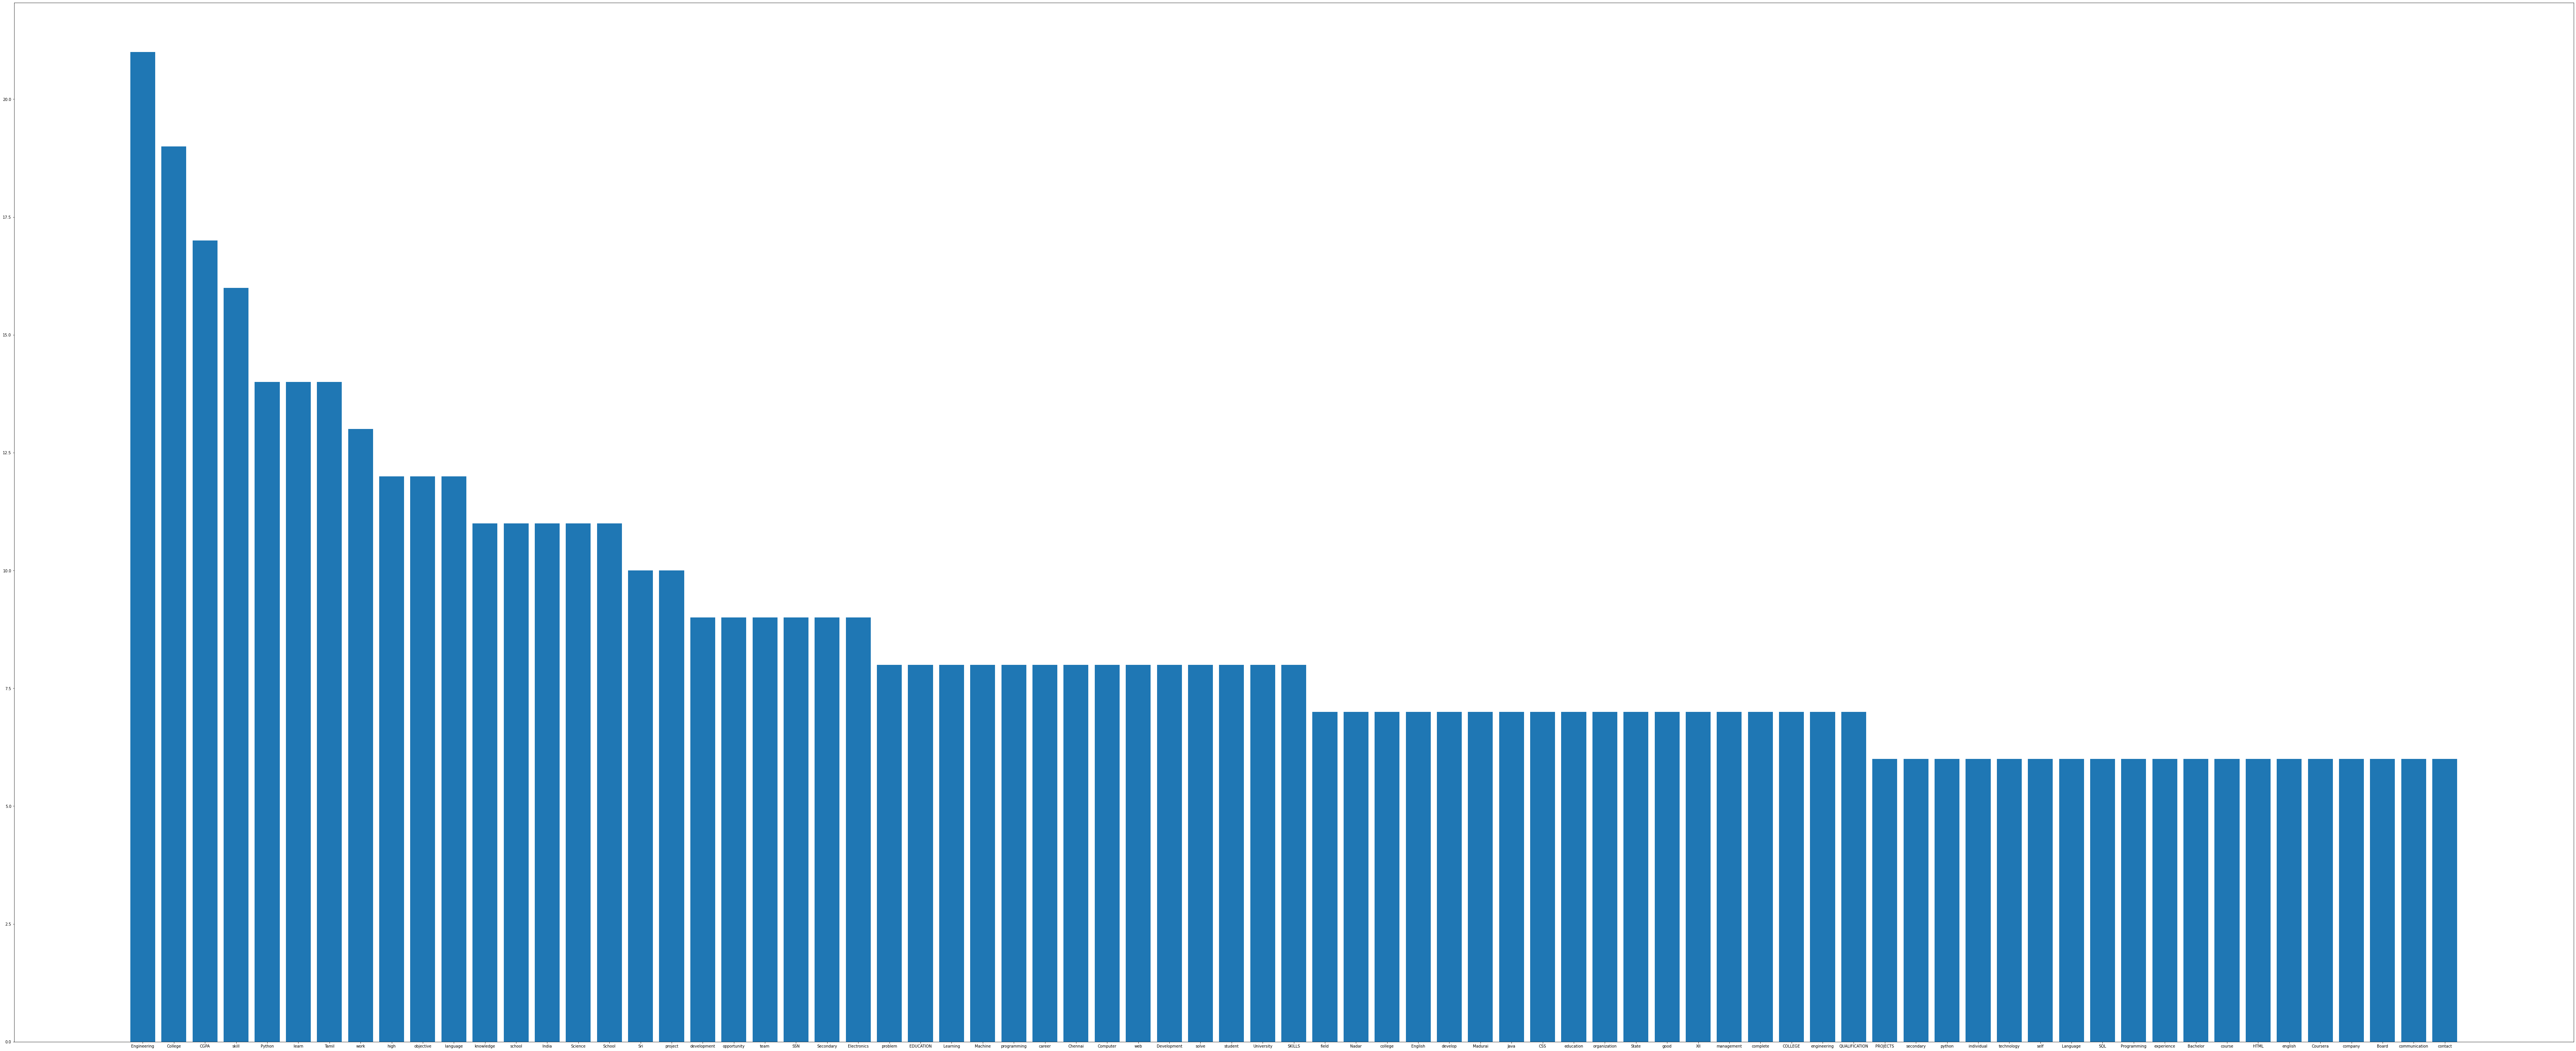

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (120,50)

common_frequency=dict(frequency.most_common(75))
print(common_frequency)

keys=list(common_frequency.keys())
values=list(common_frequency.values())

plt.bar(range(len(common_frequency)),values, tick_label=keys)
plt.show()

# Adding 25 more Keywords

We add 25 more keywords and with 100 word features, we will develop a ML model for classifying good CVs.

In [9]:
user_keywords=['asdas','asdad']
all_keywords=list(common_frequency)
all_keywords+=user_keywords

print("Length of all keywords:\t",len(all_keywords),end='\n\n')
print(all_keywords)

Length of all keywords:	 77

['Engineering', 'College', 'CGPA', 'skill', 'Python', 'learn', 'Tamil', 'work', 'high', 'objective', 'language', 'knowledge', 'school', 'India', 'Science', 'School', 'Sri', 'project', 'development', 'opportunity', 'team', 'SSN', 'Secondary', 'Electronics', 'problem', 'EDUCATION', 'Learning', 'Machine', 'programming', 'career', 'Chennai', 'Computer', 'web', 'Development', 'solve', 'student', 'University', 'SKILLS', 'field', 'Nadar', 'college', 'English', 'develop', 'Madurai', 'Java', 'CSS', 'education', 'organization', 'State', 'good', 'XII', 'management', 'complete', 'COLLEGE', 'engineering', 'QUALIFICATION', 'PROJECTS', 'secondary', 'python', 'individual', 'technology', 'self', 'Language', 'SQL', 'Programming', 'experience', 'Bachelor', 'course', 'HTML', 'english', 'Coursera', 'company', 'Board', 'communication', 'contact', 'asdas', 'asdad']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(all_keywords)